# **Load necessary libraries and the dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


# **Explore the dataset**

In [2]:
print(train_data.head())
print(train_data.info())
print(train_data.describe())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

# **Handle missing values and outliers**

In [3]:
# Check for missing values
print(train_data.isnull().sum())

# Handle outliers if necessary (not shown here)

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


# **Perform EDA**

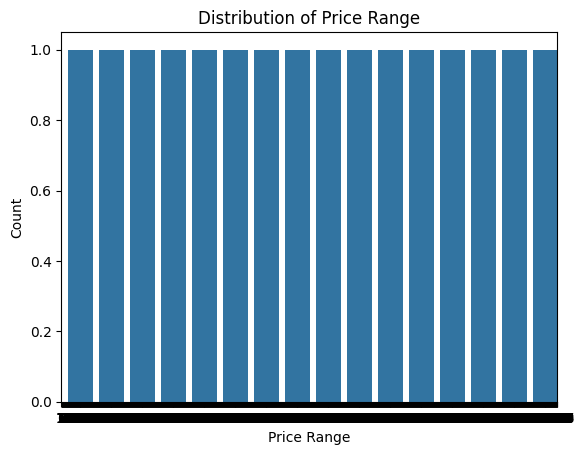

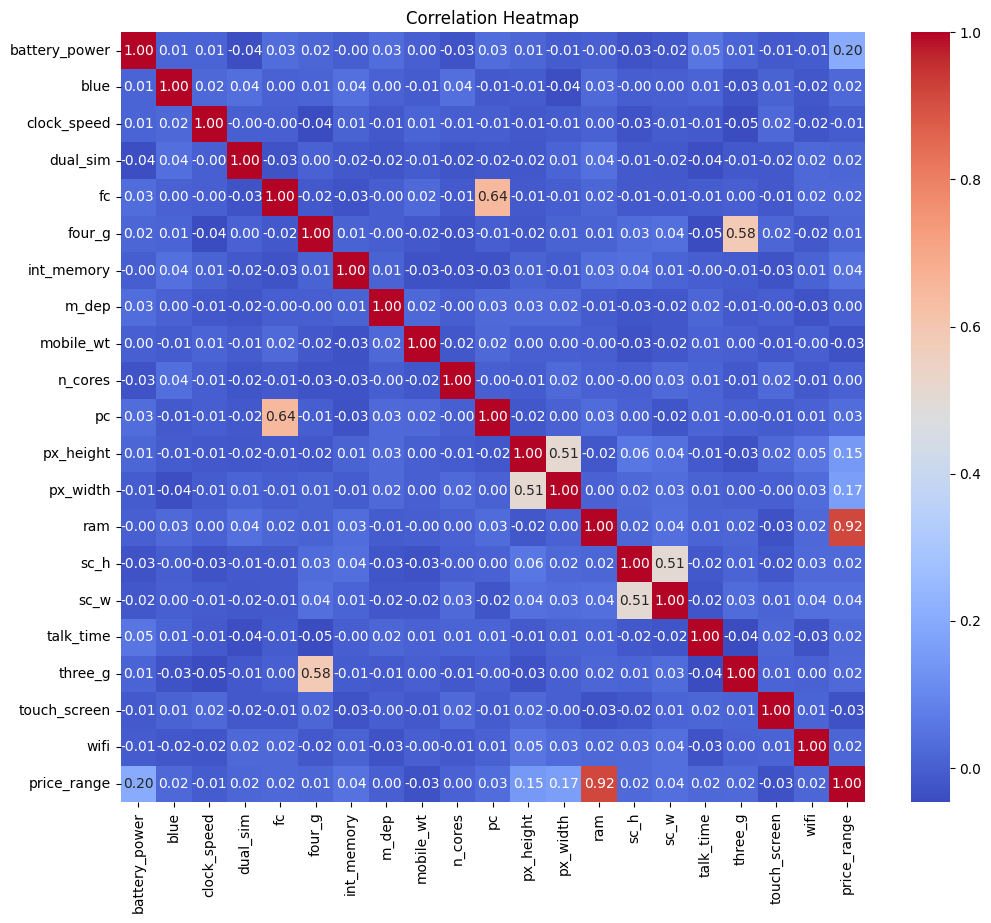

In [4]:
# Distribution of the target variable

sns.countplot(train_data['price_range'])
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# **Preprocess the data**

In [6]:
# Check for columns in test data that are not present in training data
unseen_columns = set(X_test.columns) - set(X_train.columns)

# Remove the unseen columns from the test data
X_test = X_test.drop(columns=unseen_columns, axis=1)

# Now, you can apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Choose a machine learning model**

In [7]:
# Use Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# **Train The Model**

In [8]:
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

# **Evaluate the model**

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500
           2       1.00      1.00      1.00       500
           3       1.00      1.00      1.00       500

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



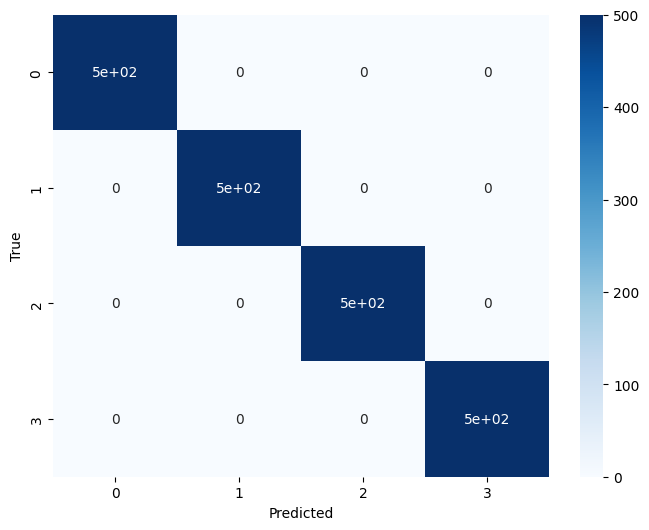

In [9]:
# Predictions
predictions = model.predict(X_train_scaled)

# Accuracy score
print("Accuracy:", accuracy_score(y_train, predictions))

# Classification report
print(classification_report(y_train, predictions))

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_train, predictions), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# **Fine-tune the model**

In [10]:
# Use cross-validation for hyperparameter tuning
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 10, 20, 30]}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': None, 'n_estimators': 300}
Best score: 0.884


# **Validate the final model**

In [11]:
final_model = grid_search.best_estimator_
scores = cross_val_score(final_model, X_train_scaled, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean accuracy:", np.mean(scores))

Cross-validation scores: [0.8825 0.9    0.89   0.88   0.8675]
Mean accuracy: 0.884


# **Make predictions on test data**

In [12]:
test_predictions = final_model.predict(X_test_scaled)

# Save predictions to a file
test_data['price_range'] = test_predictions
test_data.to_csv("predicted_prices.csv", index=False)

In [13]:
import joblib

# Train the model
model.fit(X_train_scaled, y_train)

# Save the trained model to a file named "trained_model.pkl"
joblib.dump(model, 'trained_model.pkl')

# Print the filename of the saved model
print("Trained model saved to 'trained_model.pkl'")

Trained model saved to 'trained_model.pkl'
